In [19]:
import pandas as pd
df = pd.read_csv('temp_data_with_lags.csv')
df

,lag1,lag2,lag3,target
0,24.5,24.2,22.1,22.4
1,24.2,22.1,22.4,21.8
2,22.1,22.4,21.8,21.8
3,22.4,21.8,21.8,21.8
4,21.8,21.8,21.8,22.1
...,...,...,...,...
358,23.4,22.8,24.0,23.4
359,22.8,24.0,23.4,23.4
360,24.0,23.4,23.4,23.4
361,23.4,23.4,23.4,24.3


In [20]:
df1 = df
df = df[:290]
display(df)
display(df1)

,lag1,lag2,lag3,target
0,24.5,24.2,22.1,22.4
1,24.2,22.1,22.4,21.8
2,22.1,22.4,21.8,21.8
3,22.4,21.8,21.8,21.8
4,21.8,21.8,21.8,22.1
...,...,...,...,...
285,28.8,28.2,28.4,28.8
286,28.2,28.4,28.8,29.2
287,28.4,28.8,29.2,29.6
288,28.8,29.2,29.6,30.5


,lag1,lag2,lag3,target
0,24.5,24.2,22.1,22.4
1,24.2,22.1,22.4,21.8
2,22.1,22.4,21.8,21.8
3,22.4,21.8,21.8,21.8
4,21.8,21.8,21.8,22.1
...,...,...,...,...
358,23.4,22.8,24.0,23.4
359,22.8,24.0,23.4,23.4
360,24.0,23.4,23.4,23.4
361,23.4,23.4,23.4,24.3


In [21]:
X_train = df.drop(['target'], axis='columns')
y_train = df['target']

In [22]:
display(X_train)
display(y_train)

,lag1,lag2,lag3
0,24.5,24.2,22.1
1,24.2,22.1,22.4
2,22.1,22.4,21.8
3,22.4,21.8,21.8
4,21.8,21.8,21.8
...,...,...,...
285,28.8,28.2,28.4
286,28.2,28.4,28.8
287,28.4,28.8,29.2
288,28.8,29.2,29.6


0      22.4
1      21.8
2      21.8
3      21.8
4      22.1
       ... 
285    28.8
286    29.2
287    29.6
288    30.5
289    30.5
Name: target, Length: 290, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [24]:
def forecast(df):
    lag1 = (df['lag2'].iloc[-1])
    lag2 = (df['lag3'].iloc[-1])
    lag3 = (df['target'].iloc[-1])
    y_pred = model.predict([[lag1, lag2, lag3]])
    new_row = pd.DataFrame({'lag1': [lag1], 'lag2': [lag2], 'lag3': [lag3], 'target': y_pred})
    df = pd.concat([df, new_row], ignore_index=True)
    return df

In [25]:
for i in range(73):
    df = forecast(df)
df

/home/nishanth/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/nishanth/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/nishanth/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/nishanth/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/nishanth/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/nishanth/.venv/lib/python3.12/site-packages/sklea

,lag1,lag2,lag3,target
0,24.500000,24.200000,22.100000,22.400000
1,24.200000,22.100000,22.400000,21.800000
2,22.100000,22.400000,21.800000,21.800000
3,22.400000,21.800000,21.800000,21.800000
4,21.800000,21.800000,21.800000,22.100000
...,...,...,...,...
358,26.637275,26.610609,26.584483,26.558887
359,26.610609,26.584483,26.558887,26.533811
360,26.584483,26.558887,26.533811,26.509243
361,26.558887,26.533811,26.509243,26.485174


In [26]:
y = df['target']
y_actual = df1['target']

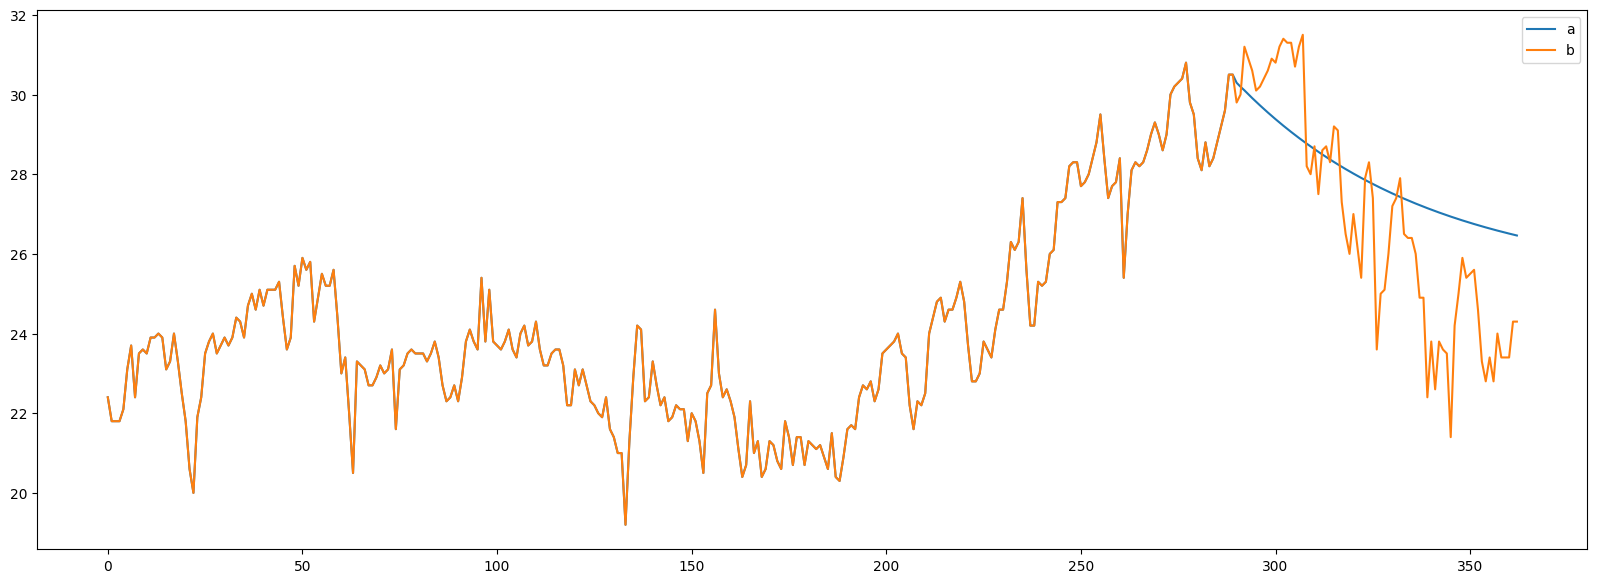

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(y)
plt.plot(y_actual)
plt.legend(['a', 'b'])
plt.show()